#### Import libraries

In [71]:
import torch
import torchvision
from torch import nn
from torchvision.datasets import FashionMNIST
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
from datetime import datetime
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import requests

# check PyTorch version
print(f"PyTorch version: {torch.__version__}")

# check torchvision version
print(f"torchvision version: {torchvision.__version__}")

# check device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

# Created date
print(f"Created date: 2023-07-11 20:35:07")

# Modified date
now = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Modified date: {now}")


PyTorch version: 1.12.1+cu102
torchvision version: 0.13.1+cu102
Device: cuda
Created date: 2023-07-11 20:35:07
Modified date: 2023-07-11 21:22:35


#### Utilities

In [75]:
def download_helper_functions(url):
    """ A download funcion for a file from github.

        Args:
            url (str): an url of a file on github
    """
    if Path("helper_functions.py").is_file():
        print("The file already exists. Skip downloading")
    else:
        print("Downloading helper_functions.py")
        results = requests.get(url=url)
        with open("helper_functions.py", "wb") as f:
            f.write(results.content)

# download helper functions
url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
# download_helper_functions(url=url)


In [76]:
def view_random_image(data, targets, class_names):
    """ Display randomly one image from images.

    Args:
        images: images of FashionMNIST.
        class_name: a list of class names in FashionMNIST.
    """

    random_idx = torch.randint(len(data), [1]).item()
    image = data[random_idx]
    class_idx = targets[random_idx].item()
    plt.imshow(image)
    plt.title(class_names[class_idx])
    plt.axis(False)

In [13]:
# batch size
batch_size = 32

# epochs 
epochs = 50

### Dataset - FashionMNIST

##### 1. Preprocessing data

In [17]:
# transform helper
transform_helper = transforms.ToTensor()

# download data
train_data = FashionMNIST(root="../../data", download=True, train= True, transform=transform_helper)

# train dataloader
train_dataloader = DataLoader(train_data, batch_size=len(train_data), shuffle=True)

# get a batch of train_dataloader
data = next(iter(train_dataloader))

print(f"Shape of train_data of one batch: {data[0].shape}")
print(f"Shape of train_label of one batch: {data[1].shape}")

# calculate mean, std of data
mean = data[0].mean()
stddev = data[0].std()

print(f"Mean: {mean:.5f} | Stddev: {stddev:.5f}")


Shape of train_data of one batch: torch.Size([60000, 1, 28, 28])
Shape of train_label of one batch: torch.Size([60000])
Mean: 0.28604 | Stddev: 0.35302


In [18]:
# class names
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

##### 2. Normalization `training_set` and `testing_set` 

In [14]:
# transform composer
transform_composer = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=mean, std=stddev)])

# download train data
train_data = FashionMNIST(root="../../data", download=True, train= True, transform=transform_composer)

# download test data
test_data = FashionMNIST(root="../../data", download=True, train= False, transform=transform_composer)

# check train_data, test_data
len(train_data), len(test_data)

(60000, 10000)

##### 3. DataLoader

In [22]:
# train_loader
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# test_loader
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

# check samples of a batch
print(f"Number of train samples each batch: {len(train_dataloader)}")
print(f"Number of test samples each batch: {len(test_dataloader)}")

Number of train samples each batch: 1875
Number of test samples each batch: 313


In [59]:
train_dataloader.dataset.targets[11].item()
class_names[9]

'Ankle boot'

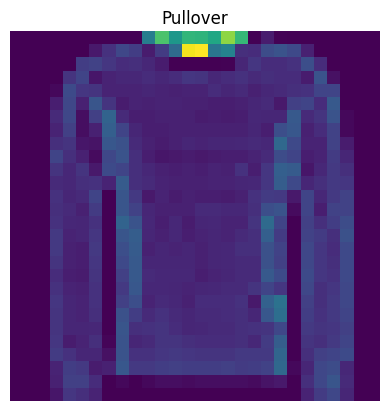

In [70]:
# view one sample
view_random_image(data=train_dataloader.dataset.data, targets=train_dataloader.dataset.targets, class_names=class_names)